# BigMart Sales Predictions

## 1.Business Problem
### 1.1 Description
This is a regression problem.In this problem you have to predict the sales of a store.The data has 14204 rows of 12 variables.

### 1.2 Sources
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#data_dictionary

## 2.Machine Learning Problem

### 2.1 Data
#### 2.1.1 Data Overviews

* Total data Point-14204</br>
* Variable-12</br>

#### Attribute-information
* 1.<b><i>Item_Fat_Content</i></b>-Low,Regular or Non-Consumable<br>
<br>
* 2.<b><i>Item_Identifier</i></b>-Unique Indentify item<br>
<br>
* 3.<b><i>Item_MRP</i></b>-Maximum retail Price<br>
<br>
* 4.<b><i>Item_Type</i></b>-product is food,dairy item or any other<br>
<br>
* 5.<b><i>Item_Visibility</i></b>-The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.<br>
<br>
* 6.<b><i>Item_Weight</i></b>-Weight of item<br>
<br>
* 7.<b><i>Outlet_Establishment_Year</i></b>-In which year outlet established<br>
<br>
* 8.<b><i>Outlet_Identifier</i></b>-Unique Indentify Store<br>
<br>
* 9.<b><i>Outlet_Location_Type</i></b>-Stores located within popular marketplaces should have higher sales because of better access to customers.<br>
<br>
* 10.<b><i>Outlet_Size</i></b>-Supermarket Type1,Grocery Store<br>
<br>
* 11.<b><i>Outlet_Type</i></b>-Medium,high<br>
<br>
* 12.<b><i>Item_Outlet_Sales</i></b>-sales in outlets<br>

### 2.2 Mapping the real-world problem to a Machine Learning Problem
#### 2.2.1 Type of Machine Learning Problem
his is a regression problem.In this problem you have to predict the sales of a store
#### 2.2.2 Performance metric
RME(Root Mean Square error)

## 3. Machine learning models

### 3.1. EDA

#### 3.1.1. Reading dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [57]:
#importing train and test files
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
data = pd.concat([train_df, test_df])

In [58]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [59]:
data.shape

(14204, 12)

In [60]:
print(data.isnull().values.any())

True


In [61]:
#dropping the rows which has null value 
data = data.dropna(how='any',axis=0)

In [62]:
#removing the dupilcate apps
data=data.drop_duplicates()

In [63]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,141.716328,2272.037489,0.060700,12.898675,1999.190538
std,62.420534,1497.964740,0.044607,4.670973,7.388800
min,31.490000,69.243200,0.000000,4.555000,1987.000000
25%,94.409400,1125.202000,0.025968,8.770000,1997.000000
50%,142.979900,1939.808300,0.049655,12.650000,1999.000000
75%,186.614150,3111.616300,0.088736,17.000000,2004.000000
max,266.888400,10256.649000,0.188323,21.350000,2009.000000


#### 3.1.2. Unique items in each coloumns

In [64]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                5
Item_Identifier              1535
Item_MRP                     3806
Item_Outlet_Sales            2449
Item_Type                      16
Item_Visibility              4280
Item_Weight                   409
Outlet_Establishment_Year       5
Outlet_Identifier               5
Outlet_Location_Type            3
Outlet_Size                     3
Outlet_Type                     2
dtype: int64

#### 3.1.3. printing all unique items


Frequency of Categories for varible %s Item_Fat_Content
Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64


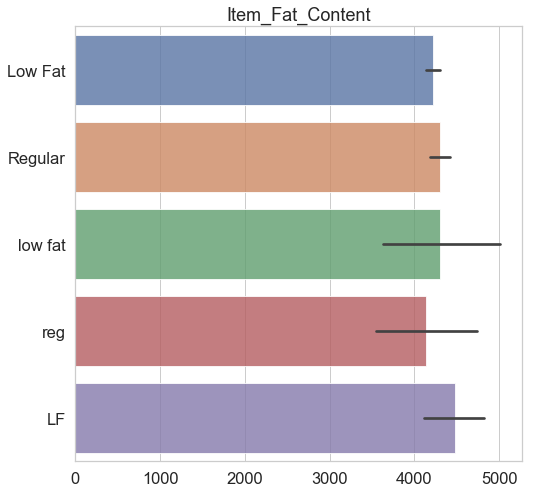


Frequency of Categories for varible %s Item_Type
Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64


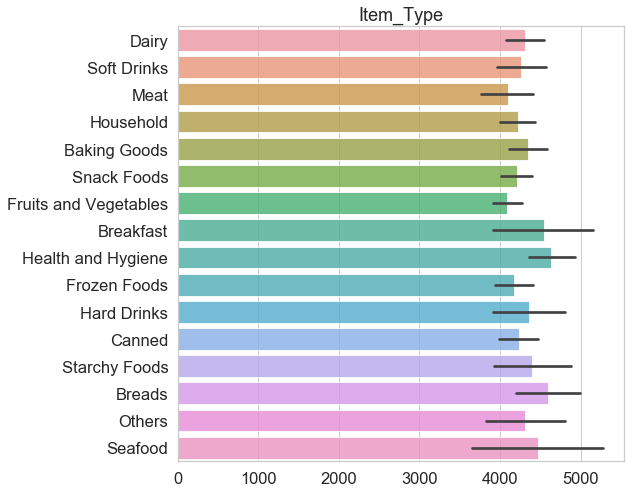


Frequency of Categories for varible %s Outlet_Identifier
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
Name: Outlet_Identifier, dtype: int64


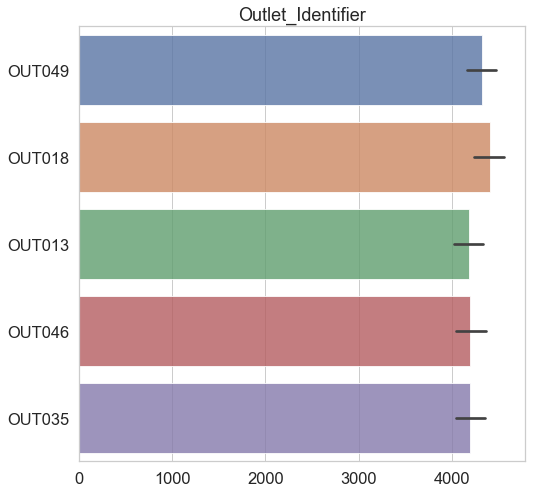


Frequency of Categories for varible %s Outlet_Location_Type
Tier 3    1860
Tier 1    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64


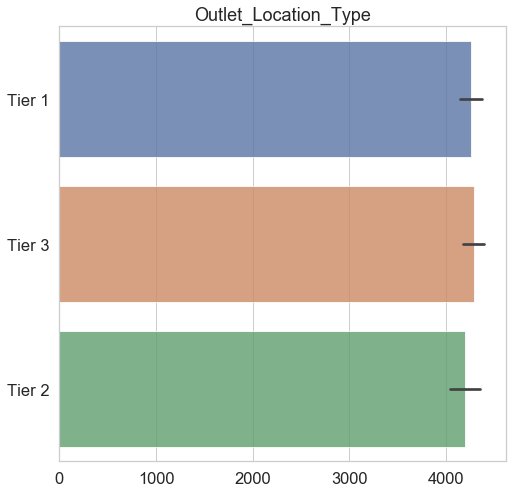


Frequency of Categories for varible %s Outlet_Size
Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64


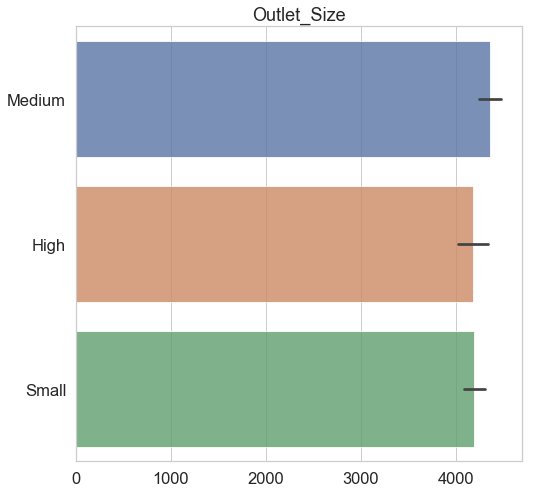


Frequency of Categories for varible %s Outlet_Type
Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


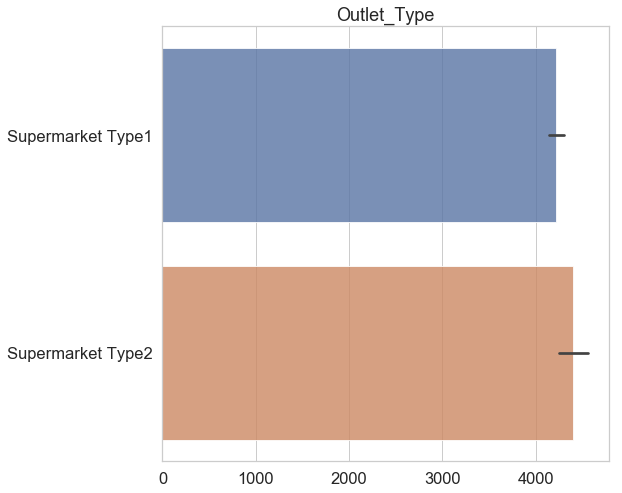

In [65]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s',col)
    print(data[col].value_counts())
    plt.figure(figsize=(8,8))
    sns.barplot(data[col].index, data[col].values, alpha=0.8)
    plt.title(col)
    plt.show()

### 4.Feature Engineering

<i>Item_Visibility cannot be zero.removing zero values from database</i>

In [66]:
indexNames = data[ data['Item_Visibility'] == 0 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

<i>Adding a new coloumns Item_Type_Combined which identify Food,Non-Consumable,Drinks</i>

In [67]:
#Get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              3141
Non-Consumable     810
Drinks             407
Name: Item_Type_Combined, dtype: int64

<i>In Item_Fat_Content Low Fat is wrongly written as LR</i>

In [68]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print( '\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    2602
Regular    1478
LF          161
reg          69
low fat      48
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    2811
Regular    1547
Name: Item_Fat_Content, dtype: int64


<i>Mark non-consumables as separate category in low_fat:</i>

In [69]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       2001
Regular       1547
Non-Edible     810
Name: Item_Fat_Content, dtype: int64

In [70]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

### 4.1. One-Hot Encoding

In [71]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [72]:
data.shape

(4358, 27)

In [73]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
d

In [74]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Type_0,Outlet_Type_1,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,1,0,...,1,0,0,1,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,0,0,...,0,1,1,0,0,0,1,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,1,0,...,1,0,0,1,0,0,0,0,0,1
6,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.65,1987,OUT013,0,0,...,1,0,0,1,0,1,0,0,0,0
11,FDA03,144.1102,2187.1530,Dairy,0.045464,18.50,1997,OUT046,0,0,...,1,0,0,1,0,0,0,0,1,0


In [75]:
#Drop the columns which have been converted to different types:
data.drop(['Outlet_Identifier','Item_Identifier','Item_Type'],axis=1,inplace=True)
y=data['Item_Outlet_Sales']

### 5. Spliting data into Test and Train(80:20)

In [76]:
train,test,y_train,y_test=train_test_split(data,y, test_size=0.2,shuffle=False)

In [77]:
print(train.shape,train.shape,y_train.shape,y_test.shape)

(3486, 24) (3486, 24) (3486,) (872,)


## 6. Machine Learning Models

### 6.1 LINEAR REGRESSION

In [98]:
# MODELLING
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 7.847057479383518e-13
Variance score: 1.00
Result : 1.0
      True Labels  Predicted Labels
6765    6930.9780         6930.9780
6766    3453.5046         3453.5046
6768    1155.8288         1155.8288
6770    3942.8676         3942.8676
6771    3894.9300         3894.9300
6772    2290.3520         2290.3520
6773     892.8378          892.8378
6777    2356.9320         2356.9320
6780    4566.7222         4566.7222
6783    4649.9472         4649.9472
6784     610.5386          610.5386
6785     862.8768          862.8768
6788    3387.5904         3387.5904
6789    5932.2780         5932.2780
6791    3225.1352         3225.1352
6793    1704.4480         1704.4480
6794    2884.2456         2884.2456
6795    1133.8574         1133.8574
6799     459.4020          459.4020
6800     932.1200          932.1200
6801    1406.1696         1406.1696
6803    1964.7758         1964.7758
6807    4474.1760         4474.1760
6808     980.0576          980.0576
6809    4731.1748         4

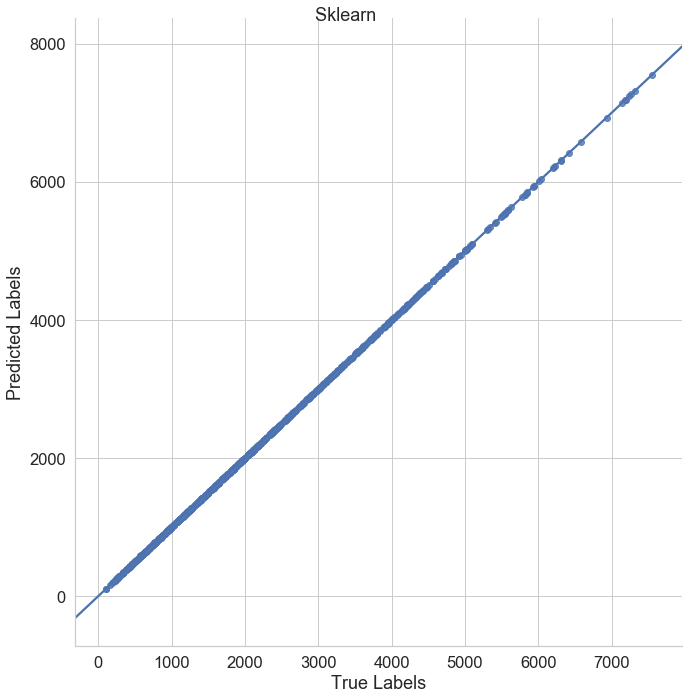

In [79]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

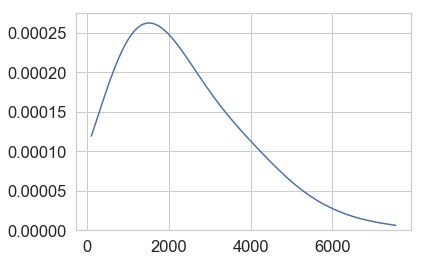

In [80]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

###  6.2. Random Forest

####  6.2.1 hypermeter Tuning

In [99]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(train, y_train)


# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 9.338466148779107
Variance score: 1.00
Result : 0.999960180250095
      True Labels  Predicted Labels
6765    6930.9780       6912.328942
6766    3453.5046       3453.231622
6768    1155.8288       1158.678424
6770    3942.8676       3942.974128
6771    3894.9300       3900.562668
6772    2290.3520       2290.791428
6773     892.8378        892.931012
6777    2356.9320       2356.359412
6780    4566.7222       4566.595698
6783    4649.9472       4646.465066
6784     610.5386        610.611838
6785     862.8768        864.687776
6788    3387.5904       3382.463740
6789    5932.2780       5949.502246
6791    3225.1352       3222.052546
6793    1704.4480       1704.234944
6794    2884.2456       2886.948748
6795    1133.8574       1133.810794
6799     459.4020        459.947956
6800     932.1200        932.386320
6801    1406.1696       1405.643618
6803    1964.7758       1965.062094
6807    4474.1760       4467.391498
6808     980.0576        980.097548
6809    4731.1748

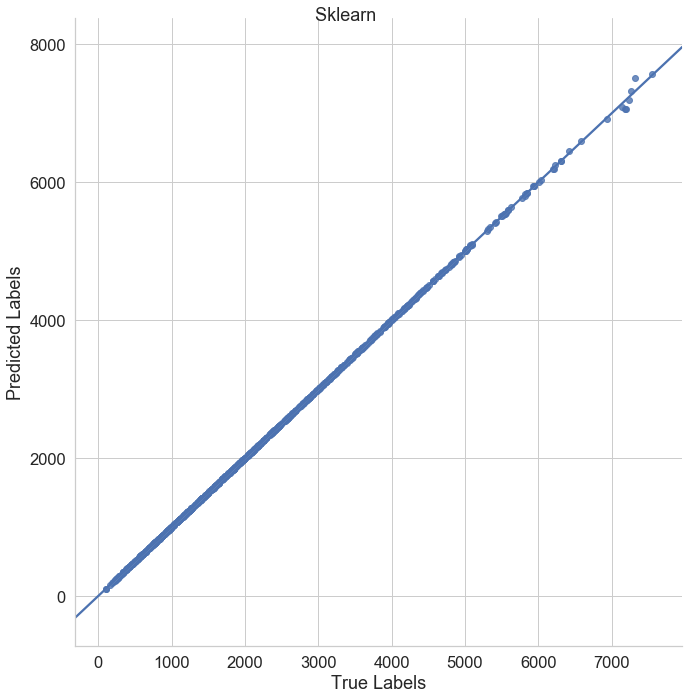

In [100]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

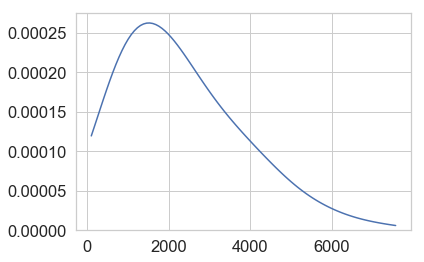

In [101]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

## Final Conclusion

|Models|Root means score|Variance score|Result|
|------|----------------|--------------|------|
|LR|7.847|1.00|1.0|
|RF|9.338|1.00|0.99|